# OMIS 114 Data Science with Python
## Assignment 5 - Missing Data and Data Visualization

#### Due February 25 at 3:50PM :: 100 Points Total - 50 Points for Camino Quiz; 50 Points for Jupyter Notebook

**Description:**<br>The file 'bitly_usagov_example.txt' contains data from the URL shortening service Bitly.<br>The data set provides a sample of records of usages of the Bitly service to shorten links ending with .gov or .mil from 2011 - 2017.<br>Perform an analysis of the records of usage of the Bitly service to shorten links ending with .gov or .mil.<br>Prepare this Jupyter notebook file to professionally present your analysis.

<ul>
<li>Expand the notebook (insert cells) as required.</li>
<li>To respond to the questions in this noteboook, generate a response in the cell immediately following a question.</li>
<li>Complete the associated quiz on Camino.</li>
<li>The points associated with the assignment questions are earned by computing and providing the correct (expected) solution values on the Camino quiz.</li>
<li>Progress points are associated with an analysis task, and are assigned based upon an assessment of the progress made toward performing the analysis task completely and correctly and generating the correct solution values.</li>
<li>Performing an analysis task correctly and generating the correct solution values earns complete progress points.</li>
<li>Up to 6 progress points for notebook presentation, professionalism, and description of analysis steps (comments).</li>
</ul>

<ul>
<li>Include all steps of the analysis in the submitted notebook.</li>
<li>To earn points on a question, the notebook analysis must compute the value provided.</li>
<li>Include a comment describing each step of the analysis.</li>
<li>The analysis code should also function on any other similar Bitly data.</li>
<li>Additional Python packages (besides those imported) may not be used in the analysis.</li>
<li>Loops may not be used in the analysis.</li>
<li>Complete this assignment independently, without inappropriate collaboration or assistance.</li>
</ul>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pd.set_option('display.max_rows', None)

## Data Description

### USA.gov Data from Bitly

In 2011, the URL shortening service Bitly (Bitly.com) partnered with the US goverment website USA.gov to provide anonymous data gathered from users who used the Bitly service to shorten links ending with .gov or .mil.  This service ended in 2017. 

In this data file, each line contains a common form of web data known as **JSON**, which stands for JavaScript Object Notation.<br>Python has built-in and 3rd party libraries for converting a JSON string into a **Python dictionary object**.<br>Then one can use **pd.DataFrame** to **convert a dictionary object into a data frame** for analysis.

**Each JSON object in the data file corresponds to a single usage of the Bitly service to shorten a .gov or .mil link, and includes several attributes describing that usage of the Bitly service.**

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11', <br>
 'al': 'en-US,en;q=0.8', <br>
 'c': 'US',<br>
 'cy': 'Danvers',<br>
 'g': 'A6qOVH',<br>
 'gr': 'MA',<br>
 'h': 'wfLQtf',<br>
 'hc': 1331822918,<br>
 'hh': '1.usa.gov',<br>
 'l': 'orofrog',<br>
 'll': [42.576698, -70.954903],<br>
 'nk': 1,<br>
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',<br>
 't': 1331923247,<br>
 'tz': 'America/New_York',<br>
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}<br>
 

In [5]:
import json
file_name = 'bitly_usagov_example.txt'
records = [json.loads(line) for line in open(file_name)]

In [6]:
records[0:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

* **a**: info about the browser, device, or application used to perform the URL shortening using the Bitly service
* **c**: country of the user of the Bitly service
* **cy**: city of the user of the Bitly service
* **gr**: state of the user of the Bitly service
* **ll**: longitude and latitude coordinates of the user of the Bitly service
* **tz**: timezone of the user of the Bitly service
* **u**: original URL that was shortened using the Bitly service

#### The Bitly usage records from the data file are now stored in 'records', a dictionary object.<br>Convert these dictionary records into a data frame for analysis.<br>Determine the correct method to use through independent research.<br><br>Then, use the data frame to answer the following questions.

In [7]:
df = pd.DataFrame.from_dict(records)

In [8]:
df

a     c   nk  \
0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...    US  1.0   
1                                GoogleMaps/RochesterNY    US  0.0   
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...    US  1.0   
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...    BR  0.0   
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...    US  0.0   
5     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...    US  0.0   
6     Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...    PL  0.0   
7     Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...  None  0.0   
8     Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...  None  0.0   
9     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  None  0.0   
10    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...    US  1.0   
11    Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...    US  0.0   
12    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...    US  1.0   
13                                                  NaN   NaN  NaN   
14    Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...    US  1.0   
15    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...    HK  1.0   
16    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...    HK  1.0   
17    Mozilla/5.0 (Macintosh; Intel Mac OS X 10.5; r...    US  0.0   
18                               GoogleMaps/RochesterNY    US  0.0   
19    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...    IT  0.0   
20    Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...    ES  0.0   
21    Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.6...    US  0.0   
22    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...    US  0.0   
23    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3)...    US  0.0   
24    Mozilla/5.0 (Windows; U; Windows NT 5.1; es-ES...    ES  0.0   
25    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...    MY  0.0   
26    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...    CY  0.0   
27    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...    BR  0.0   
28    Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...  None  0.0   
29    Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X...  None  1.0   
30    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...    GB  0.0   
31    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...    US  0.0   
32    Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...    US  1.0   
33    Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...    US  1.0   
34    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...  None  1.0   
35    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  None  0.0   
36    Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...    US  1.0   
37    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...  None  1.0   
38    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...    US  0.0   
39    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...    US  1.0   
40    Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Ma...    US  0.0   
41    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...    US  0.0   
42    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...    IT  0.0   
43    Mozilla/5.0 (Windows NT 6.1; rv:9.0.1) Gecko/2...    US  1.0   
44    Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...    US  1.0   
45    Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...    US  1.0   
46    BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Conf...  None  0.0   
47    Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...  None  0.0   
48    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:9.0.1) ...    US  1.0   
49    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...    US  0.0   
50    Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/...    MT  0.0   
51    Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; L...    US  0.0   
52    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...    US  1.0   
53    Mozilla/5.0 (compatible; MSIE 9.0; Windows Pho...  None  0.0   
54    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...    US  1.0   
55                                                  NaN   NaN  NaN   
56    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...    BR  0

#### Question 1:<br><br>In total, how many Bitly usage records are included in the data frame?<br><br>4 points for result

In [20]:
len(df) #length of the dataframe

3560

#### Question 2:<br><br>In the city column ('cy'), how many values are NaN?<br><br>4 points for result

In [22]:
df.cy.isna().sum() #sums the number of Nan values in the city column

641

#### Question 3:<br><br>Excluding NaN values, how many different countries used the Bitly service?<br><br>6 points for result

In [13]:
len(df.c.dropna().unique()) #length of the unique countries excluding NaN values

71

#### Question 4:<br><br>In terms of the number of usage records in the data set, what are the top 5 cities outside of the US to have used the Bitly service?<br><br>3 points for result; plus up to 3 progress points

In [58]:
df[df.c != 'US'].groupby('cy')['cy'].count().sort_values(ascending = False).head(5) #sorted groups of cities that are not in the US

cy
Nogata    29
London    16
Madrid    13
Mexico    12
SPaulo    11
Name: cy, dtype: int64

#### Question 5:<br><br>How many Bitly usage records are from users in the country of Russia (RU)?<br><br>3 points for result; plus up to 3 progress points

In [61]:
len(df[df.c == 'RU']) #length of dataframe where country is not Russia

13

#### Question 6:<br><br>Among the Bitly usage records from Russia, which city in Russia has the largest number of usage records in the data set?<br><br>4 points for result; plus up to 4 progress points

In [63]:
df[df.c == 'RU'].groupby('cy')['cy'].count().sort_values(ascending = False).head(1) #returns the Russian city with the largest usage

cy
Moscow    8
Name: cy, dtype: int64

#### Question 7:<br><br>Among the Bitly usage records from Russia, how many usages of the Bitly service shortened a 'cia.gov' URL?<br><br>4 points for result; plus up to 4 progress points

In [71]:
len(df[(df.c == 'RU') & (df.u.str.contains('cia.gov'))]) #length of dataframe from Russia where URL contains 'cia.gov'

2

#### Question 8:<br><br>Further prepare the data in the timezone column ('tz').<br>If a timezone value is empty, fill it with 'Unknown'.<br>If a timezone value is NaN, fill it with 'Missing'.<br>After this preparation, how many timezone values are 'Missing', and how many are 'Unknown'?<br><br>5 points for result; plus up to 5 progress points

In [82]:
df.replace('', 'Unknown', inplace = True) #replaces empty values with 'unknown'
df.tz.fillna('Missing', inplace = True) #replaces Nan values with 'missing'

In [90]:
print ('Unknown: '  + str (len (df[df.tz == 'Unknown']))) #number of 'unknown' in the timezone column
print ('Missing: ' + str(len (df[df.tz == 'Missing']))) #number of 'missing' in the timezone column

Unknown: 521
Missing: 120


#### Question 9:<br><br>In terms of the number of usage records in the data set, what are the top 10 timezones to have used the Bitly service?<br>Exclude 'Unknown' and 'Missing' timezone values.<br><br>5 points for result; plus up to 5 progress points

In [135]:
table = df[(df.tz != 'Unknown') & (df.tz != 'Missing')].groupby('tz')['tz'].count().sort_values(ascending = False).head(10) #returns top 10 timezones excluding 'unknown' and 'missing' values
table

tz
America/New_York       1251
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Europe/Berlin            28
Name: tz, dtype: int64

#### Question 10:<br><br>Use the Seaborn package to create a horizontal bar plot based upon the results from the previous question.<br>Plot timezone on the Y-axis.<br><br>4 points for result; plus up to 4 progress points

tz  count
0     America/New_York   1251
1      America/Chicago    400
2  America/Los_Angeles    382
3       America/Denver    191
4        Europe/London     74
5           Asia/Tokyo     37
6     Pacific/Honolulu     36
7        Europe/Madrid     35
8    America/Sao_Paulo     33
9        Europe/Berlin     28

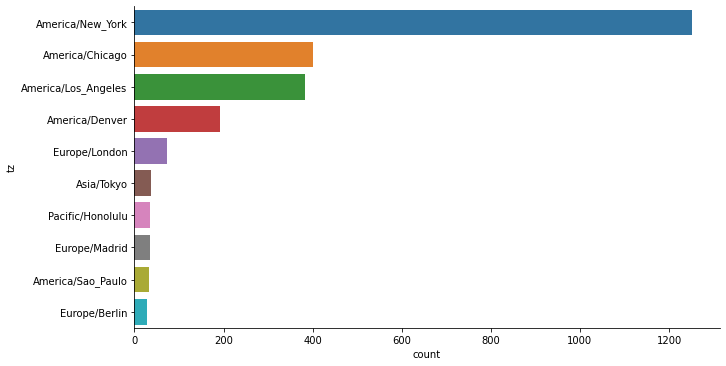

In [151]:
df2 = pd.DataFrame(table) #converts last questions results into dataframe
df2 = df2.rename(columns = {'tz':'count'}) #rename column to timezone and count
df2.reset_index(level = 0, inplace = True) #reset the index
df2
sns.catplot(y='tz', data=df2, x='count', aspect=2, kind='bar') #use seaborn lib to create horizontal bar chart where x = count and y = timezone

#### Question 11:<br><br>Based upon analysis of the country column ('c'), how many Bitly usage records are from the US?<br>Next, based upon the presence of the 'America' keyword in the timezone column ('tz'), how many Bitly usage records are from America?<br><br>6 points for result; plus up to 6 progress points

In [122]:
print ('From US: ' + str(len(df[df.c == 'US']))) #number of records from the US

From US: 2305


In [123]:
print ('From America: ' + str(len(df[df.tz.str.contains('America')]))) #number of records from America

From America: 2412


#### Question 12:<br><br>Determine which Bitly usage records contain 'America' in the timezone column ('tz'), but do not have US in the country column ('c').<br>How many Bitly usage records meet these criteria?<br>Output the number of records, and an example of 10 records displaying the timezone and country columns.<br><br>6 points for result; plus up to 6 progress points

In [121]:
len(df[(df.tz.str.contains('America')) & (df.c != 'US')]) #number of records with 'America' but not in the US
df[(df.tz.str.contains('America')) & (df.c != 'US')][['tz','c']].head(10) #dataframe of records with 'America' but not in the US

143

tz   c
3      America/Sao_Paulo  BR
27     America/Sao_Paulo  BR
56     America/Sao_Paulo  BR
86      America/Mazatlan  MX
97     America/Sao_Paulo  BR
99     America/Vancouver  CA
110    America/Sao_Paulo  BR
131  America/Rainy_River  CA
167    America/Sao_Paulo  BR
214  America/Rainy_River  CA